In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import torch

In [2]:
is_cuda = False
if torch.cuda.is_available():
    is_cuda = True

# Load data

In [3]:
savePath = "C:/Users/Yeonkang/Desktop/Deep_Learning/Image_Recognition/Vanilla_CNN/Python/Vanilla_CNN-dogsandcats.pth"

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1, padding=0)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(56180,500)
        self.fc2 = nn.Linear(500,50)
        self.fc3 = nn.Linear(50,2)
        
    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

In [5]:
model = Net()
if is_cuda:
    model.cuda()

model.load_state_dict(torch.load(savePath))

<All keys matched successfully>

In [6]:
from torchvision import transforms
from torchvision.datasets import ImageFolder

simple_transform = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
test = ImageFolder('C:/Users/Yeonkang/Desktop/Deep_Learning/Image_Recognition/Vanilla_CNN/Python/data/dogsandcats/test', simple_transform)
test_data_gen = torch.utils.data.DataLoader(test, batch_size=16, num_workers=3)

# Predict labels of test data

In [7]:
import math

predicted_res = []
for i in range(math.ceil(len(test)/64)):
    it = iter(test_data_gen)
    images,labels = it.next()

    outputs = model(images.cuda())
    _,predicted = torch.max(outputs,1)
    temp = predicted.cpu().numpy().flatten()
    predicted_res.extend(temp)

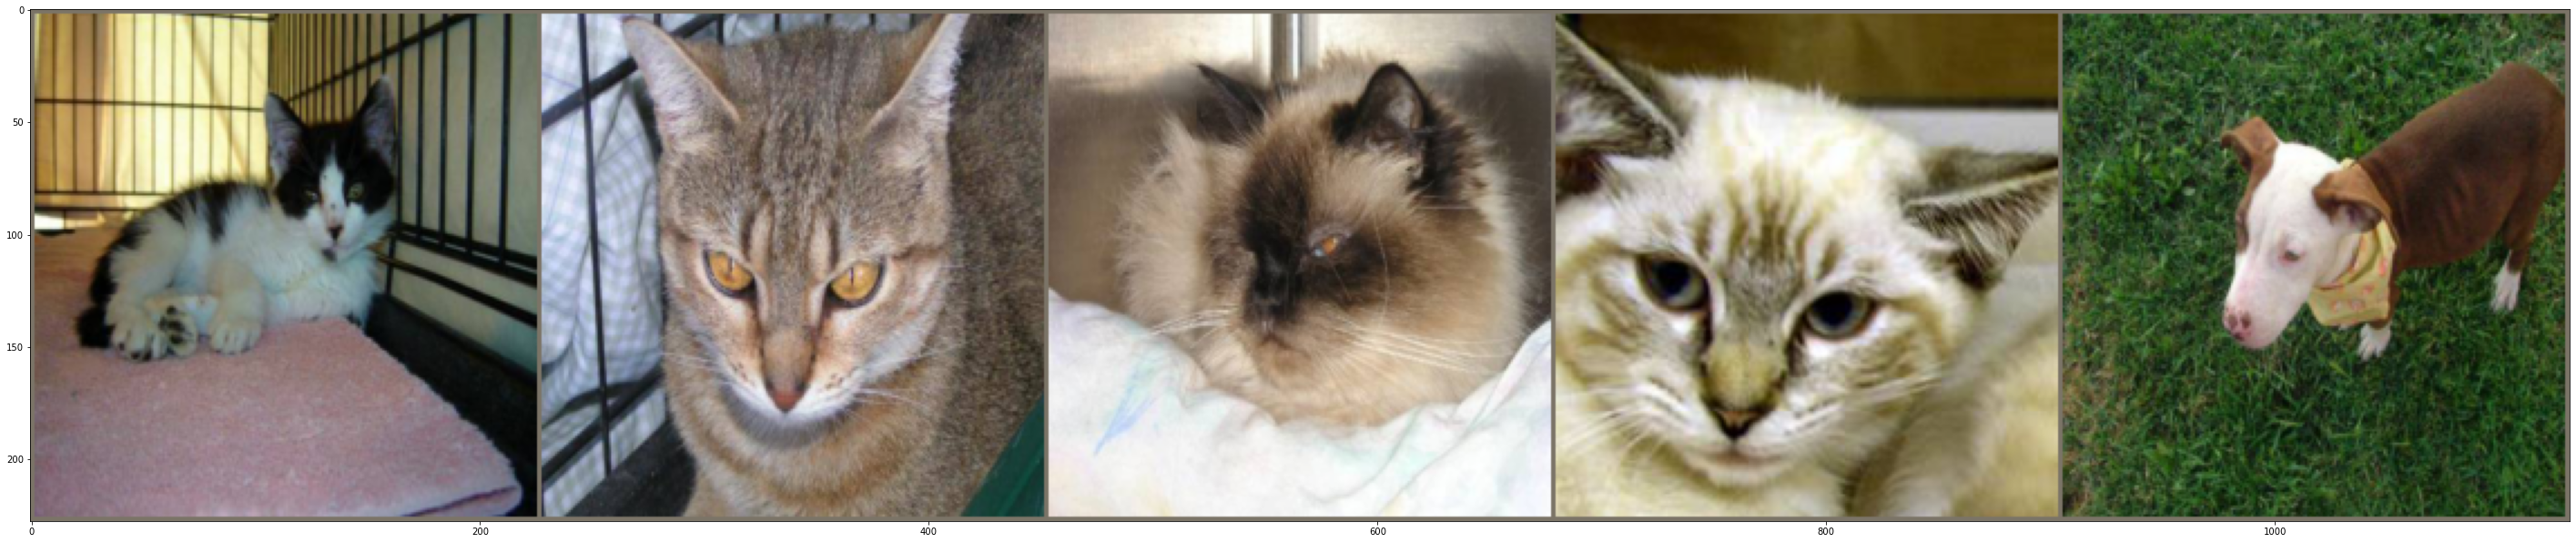

In [8]:
import torchvision

def imshow(inp):
    inp = inp.numpy().transpose((1,2,0))
    mean = np.array([0.485,0.456,0.406])
    std = np.array([0.229,0.224,0.225])
    inp = std * inp + mean
    inp = np.clip(inp,0,1)
    plt.imshow(inp)
    
plt.figure(figsize=(50,20))
imshow(torchvision.utils.make_grid(images[-5:]))

In [9]:
predicted_res[-5:]

[0, 0, 0, 1, 1]

- cat : 0
- dog : 1

References
- https://github.com/svishnu88/DLwithPyTorch
- https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html